<a href="https://colab.research.google.com/github/AlexUmnov/genai_course/blob/main/week2_llm_agents/seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this week's practice session we'll learn:

- How to use LangChain, one of the most popular library to simplify LLM interaction;
- How to add plugins to an LLM with LangChain;
- How to interact with a database using an LLM.

# LangChain

LangChain is a handy library which supplies a whole infrastucture around LLMs (both open source and available by API) allowing to quickly establish LLM-powered services. It can help you with many LLM related tasks, from prompt optimisation to creating multi-call LLM agents.

Let's see how to use LangChain. First of all, download the library:

In [2]:
import os

open_ai_api_key = open('../../keys/.open-ai-api-key').read().strip()
os.environ['OPENAI_API_KEY'] = open_ai_api_key

In [3]:
!pip install openai langchain

  Using cached async_timeout-4.0.3-py3-none-any.whl.metadata (4.2 kB)
  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
  Using cached aiosignal-1.3.1-py3-none-any.whl (7.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.6/803.6 kB 240.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.8/387.8 kB 2.2 MB/s eta 0:00:00a 0:00:01
Using cached async_timeout-4.0.3-py3-none-any.whl (5.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 2.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.8 MB/s eta 0:00:0000:0100:01
Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

The easiest thing you can do with LangChain is just calling an LLM.  We'll do it for OpenAI API:

Note: The base model for OpenAI class is `text-davinci-003`, the significance of that will become apparent later

In [4]:
from langchain.llms import OpenAI

llm = OpenAI()

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`.
  warn_deprecated(


In [5]:
print(llm.predict(
    "What is the difference between cats and dogs? In two words:"
))

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `predict` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


 instinct and behavior. 

Cats and dogs are both popular domestic pets, but they have many differences in terms of their natural instincts and behaviors.

Instinct refers to a natural, innate behavior that an animal possesses, while behavior refers to actions that an animal learns and displays through experience and training.

Cats are solitary hunters by nature and have a strong independent streak. They are known for their agility, quick reflexes, and stealthy hunting skills. Cats are also known for their grooming habits and spend a significant amount of time cleaning themselves. They are also relatively low maintenance and do not require as much attention or exercise as dogs.

On the other hand, dogs are social animals that live and hunt in packs. They have a strong pack mentality and are highly trainable. Dogs are also known for their loyalty and protective nature, making them great companions and guard animals. They require regular exercise and attention from their owners to stay h

As you can see, the interface is already much simpler, compared to writing it on your own.

LangChain also destinguishes between LLM's and Chat models.

A difference is very subtle and mostly affect the format in which you pass data. LLM's are a pure text completion models, which means they input text and output text. Where is ChatModels work on a list of ChatMessages, which can be AIMessage, HumanMessage or SystemMessage (this difference we covered in week 1) and return an AIMessage.

Newer OpenAI only implement chat interface, for example gpt-3.5-turbo, gpt-4, etc. This means, that you cannot use them as an LLM.

Default for ChatOpenAI is `gpt-3.5-turbo`

In [9]:
from langchain_openai import ChatOpenAI
from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)

chat = ChatOpenAI()
chat.predict_messages([
    HumanMessage(content="In two words what's the difference "\
        "between Cats and Dogs?")
])

AIMessage(content='Behavior, companionship')

Note: Draw your attention to the fact that we received a `AIMessage` instead of a string

### Prompt templates

A useful feature of LangChain is Prompt templates.

If you need to use the same prompt structure with different parameters, prompt templates can save you from the text duplication. See, for example:

In [11]:
from langchain.prompts import PromptTemplate

prompt = PromptTemplate.from_template(
    "What is the national cousine of {country}?"
)
prompt.format(country="Australia")

'What is the national cousine of Australia?'

Now our imaginary user needs only to select a country instead of creating a whole prompt.

### Chaining

One of the main pillars of LangChain is the concept of chaining, that is of combining several LLM calls, external function calls, etc.

Much like you combine layers in neural networks, but here we have a much more diverse set of tools.

A very basic chain consists of prompt template and an LLM call. It's almost like a "function" for an LLM:

In [13]:
from langchain.chains import LLMChain

chain = LLMChain(llm=llm, prompt=prompt)
chain.invoke("Australia")

{'country': 'Australia',
 'text': '\n\nThe national cuisine of Australia is often referred to as "modern Australian cuisine" or "Australian fusion cuisine." It is a diverse blend of influences from Indigenous Australian, British, European, and Asian cuisines. Some popular dishes include meat pies, fish and chips, barbecue, and pavlova.'}

Note by the way that, although we had a typo in the prompt template ("cousine" instead of "cuisine"), LLM managed to mitigate with it. You probably shouldn't rely on this too much, but generally LLMs, that are trained on data containing typos as well, can be able to cope with some amount of mistakes in the prompts.

To combine multiple calls into one function you can use `SimpleSequentialChain`. It allows you to naively pass the output of previous request as an input for another prompt template.  

In [14]:
from langchain.chains import SimpleSequentialChain

first_prompt = PromptTemplate.from_template(
    "What is the capital of {country}?"
)
first_chain = LLMChain(llm=llm, prompt=first_prompt)

second_prompt = PromptTemplate.from_template(
    "{city} is the capital of which country?"
)
second_chain = LLMChain(llm=llm, prompt=second_prompt)

simple_sequential_chain = SimpleSequentialChain(
    chains=[first_chain, second_chain],
    verbose=True
)

Intuitively now we should receive the same thing we inputted, let's try.

In [15]:
simple_sequential_chain.run("Israel")



> Entering new SimpleSequentialChain chain...


The capital of Israel is Jerusalem.


Israel.

> Finished chain.


'\n\nIsrael.'

If you want to make a more complicated chain with multiple inputs and outputs, you should use `SequentialChain`


In [16]:
from langchain.chains import SequentialChain

first_prompt = PromptTemplate(
    input_variables=['country', 'letter'],
    template="Name a city of {country} starting with {letter}",
)
first_chain = LLMChain(
    llm=llm,
    prompt=first_prompt,
    output_key='city'
)

second_prompt = PromptTemplate(
    input_variables=['city'],
    template="What is the main attraction in {city}?"
)
second_chain = LLMChain(
    llm=llm,
    prompt=second_prompt,
    output_key='attraction'
)

sequential_chain = SequentialChain(
    chains=[first_chain, second_chain],
    input_variables=["country", "letter"],
    output_variables=["city", "attraction"],
    verbose=True
)


In that case you'll have to pass input arguments as a dict.

In [17]:
sequential_chain({"country": "France", "letter": "P"})

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new SequentialChain chain...

> Finished chain.


{'country': 'France',
 'letter': 'P',
 'city': '\n\nParis',
 'attraction': '\n\nThe main attraction in Paris is the Eiffel Tower, which is an iconic landmark and symbol of the city. Other popular attractions include the Louvre Museum, Notre-Dame Cathedral, Arc de Triomphe, and the Champs-Élysées.'}

# Task 1

In this task we'll learn how to rewrite ChatGPT interaction code to LangChain.

In the previous week we implemented translate and summarise function. Rewrite it using `SequentialChain`

In [18]:
from langchain.chains import SequentialChain

summarise_prompt = PromptTemplate(
    input_variables=['text'],
    template="Write a short summary of the following text.\n{text}"
)
summarise_chain = LLMChain(
    llm=llm,
    prompt=summarise_prompt,
    output_key='summary'
)

translate_prompt = PromptTemplate(
    input_variables=['summary', 'target_language'],
    template="Translate the following text to {target_language}:\n{summary}"
)
translate_chain = LLMChain(
    llm=llm,
    prompt=translate_prompt, output_key='translation'
)

summarise_and_translate_chain = SequentialChain(
    chains=[summarise_chain, translate_chain],
    input_variables=["text", "target_language"],
    output_variables=["summary", "translation"],
    verbose=True
)

In [19]:
article = open("../../Week1/Week1_practice_materials/wikipedia_article_japanese.txt").read()

summarise_and_translate_chain(
    {'text': article, "target_language": "English"}
)



> Entering new SequentialChain chain...

> Finished chain.


{'text': '肉球\n\nページ\nノート\n閲覧\n編集\n履歴表示\n\nツール\n出典: フリー百科事典『ウィキペディア（Wikipedia）』\n曖昧さ回避\tこの項目では、ネコ目動物の足裏にある肉球について説明しています。\nお笑いタレントの肉球については「肉球 (お笑い芸人)」をご覧ください。\n印鑑・スタンプ類の商標については「にくきう」をご覧ください。\nアダルトゲームブランドについては「にくきゅう」をご覧ください。\nQuestion book-4.svg\nこの記事は検証可能な参考文献や出典が全く示されていないか、不十分です。出典を追加して記事の信頼性向上にご協力ください。（このテンプレートの使い方）\n出典検索?: "肉球" – ニュース · 書籍 · スカラー · CiNii · J-STAGE · NDL · dlib.jp · ジャパンサーチ · TWL（2015年7月）\n\nイヌの肉球\nA.爪\nB.指球/趾球\nC.掌球/足底球\nD.狼爪\nE.手根球\n肉球（にくきゅう）とは、主にネコ目（食肉目）の動物の足裏部に見られる、盛り上がった無毛の部分の名称。\n\n正式には蹠球（しょきゅう）と言うが、肉球の一部を指す「掌球」との混同を避ける目的もあり一般的に肉球と俗称される。英語では肉球の並んでいる足を指してpaw、個々の肉球をpadと呼び区別する。\n\n構造\n同様の外見・構造をしていても前足と後ろ足で名称が区別される。\n\n前足\n掌球（しょうきゅう、metacarpal pad） - 前足の裏、中央に位置する大きめの肉球。字で分かるように、人間の掌に相当する。\n指球（しきゅう、digital pad） - 掌球の外側に5つ並んだ肉球。1つは他の4つと離れて位置しており、これが人間の親指に相当する。\n手根球（しゅこんきゅう、carpal pad） - 掌球の上部、人間の手首に相当する位置にある肉球。後ろ足には類似する肉球は存在しない。\n後ろ足\n足底球（そくていきゅう、footpad） - 後ろ足の裏、中央に位置する大きめの肉球。狭義にはこの部分を蹠球と呼ぶ。\n趾球（しきゅう、digital pad） - 足底球（蹠球）の外側に4つ並んだ肉球。\n押すとぷにぷにとした独特の触感がある。外側は角質層が厚くなったも

# ChatGPT plugins and conversation memory

In this part we'll explore two cool features of LangChain: **Agents** and **Memory**. You will learn how to:

- access internet inside a chain;
- remember the conversation history and adjust to it.

**Agents** allow you to use tooling like web search, calling apis, math, python code etc. (they are known as "Plugins" in ChatBPT Web UI) to achive the goal of the given task.

**Memory** allows you to keep a state of the conversation, just like what you see in the WebUI of ChatGPT.

If you combine the two you can essentially get the same interface as ChatGPT WebUI has with plugins.

### Web search

There are plenty of search engines available. We'll try DuckDuckGo, but feel free to use any other for your projects.

Let's install the library.

In [20]:
!pip install duckduckgo-search

  Using cached lxml-5.1.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 4.4 MB/s eta 0:00:00a 0:00:010m
Using cached lxml-5.1.0-cp39-cp39-macosx_11_0_arm64.whl (4.5 MB)


A search engine is a **tool**. And to use it we need an **agent**:

In [21]:
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain.llms import OpenAI
from langchain.tools import DuckDuckGoSearchRun

llm = OpenAI(temperature=0)

tools = [DuckDuckGoSearchRun()]

agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, # list a tool and say "this tool does this"
    verbose=True
)


/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(


Now if we push a prompt to the agent, it will perform a well structured multi-step job that includes planning, actions and some more:

In [22]:
agent.run("What are the most famous K-pop bands?")



> Entering new AgentExecutor chain...
 I should search for this information online.
Action: duckduckgo_search
Action Input: "most famous K-pop bands"

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_community/utilities/duckduckgo_search.py:47: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:



Observation: BTS Big Hit Music (HYBE Labels) 95,988 votes Hailing from South Korea, this globally-acclaimed septet is renowned for their meticulously crafted blend of K-pop and hip-hop, which has won numerous awards and garnered millions of fans across the globe. Home » Entertainment 33 Best K-Pop Groups Of All Time By Liam Flynn December 19, 2023 Idol culture has been a part of both Asian and American culture for decades; the music industry has responded to the demand for more pop music and idols by introducing a steady stream of Korean pop, or K-pop, stars. BTS (방탄소년단) BTS or Bangtan Sonyeon Dan, is a Korean K-pop boy group with seven members under Big Hit Entertainment. They are one of the most successful and popular boy bands of all time, recently becoming a global phenomenon. By Rolling Stone July 20, 2023 Photo illustration by Griffin Lotz. Photographs in illustration by Emma McIntyre/Getty Images; John Shearer/Getty Images; Ten Asia/Multi-Bits/Getty Images, 2; Marco... BIGBANG 

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_community/utilities/duckduckgo_search.py:47: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:



Observation: BTS 's popularity has somehow made many fans refer them to the group's legendary senior, BIGBANG, which is why BTS is often called " BIGBANG inheritor " by many Kpop fans. Contents Although they debuted in two different eras, BIGBANG and BTS have many things in common that stunned their fans. legacy fame can still stand even when their stats and overall popularity is surpassed. i don't think we need to say bts "dethroned" bigbang in order to say bts' popularity is wider and higher than what bigbang achieved. it was a different time and the scale that bigbang could reach had a limit. trying to say bts are the kings of kpop and kicked bigbang off the top will just start ... BIGBANG Daesung's departure from YG Entertainment sent shockwaves through the K-pop community, but the artist's subsequent move to a new label has proven to be a strategic and invigorating decision. BIGBANG and BTS are two famous K-pop boy groups. (Image: Kpopping) On January 13, 2023, Taeyang (BIGBANG) 

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_community/utilities/duckduckgo_search.py:47: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:



Observation: Staff Writer 10 months ago K-pop, short for Korean pop, has taken the world by storm in recent years. This dynamic and genre-defying form of music has captivated audiences from all walks of life, with its catchy tunes, captivating choreography, and charismatic performers. On one hand, proponents of K-pop argue that it has a positive influence on young people. They point to the many benefits of listening to music, such as stress relief, improved mood, and increased ... "K-pop exports hit a new high last year," says Kim Jin-woo, the head researcher at Circle Chart, one of the most influential Korean popular music charts. "But nevertheless, there are signs of ... FAQ What is the negative effect of K-pop culture? Impaired social skills may affect K-pop addiction. Clearly, most K-pop addicts are not. They prefer to sit anywhere and enjoy their favorite hits or Super His Junior New His albums without disturbing others. Such attitudes can damage relationships with others. March 

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_community/utilities/duckduckgo_search.py:47: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:



Observation: Characterized by catchy hooks, polished choreography, grandiose live performances, and impeccably produced music videos, K-pop — including music by groups like BTS and BLACKPINK — now frequently tops the Billboard charts, attracts a fiercely dedicated online following, and generates billions of dollars. in the region. Photo by Aditya Chinchure on Unsplash However, critics of K-pop argue that the hyper-sexualized and violent imagery in some K-pop music videos can have a negative influence on young people.... Beyond the music itself, K-Pop has had profound positive impacts on various aspects of society, transcending cultural boundaries and fostering a sense of unity among diverse communities. — Raphael Rashid (@koryodynasty) February 12, 2022 K-pop has also had a profound impact on youth culture in South Korea. For many young people, K-pop is a source of inspiration and a symbol of hope. It provides them with an outlet for their creativity and a platform for their voices to

'The most famous K-pop bands are BTS and BIGBANG, and there are both positive and negative effects of K-pop culture. K-pop has had a significant impact on global culture and youth culture in South Korea.'

**A tricky question:** where is the LLM used in this chain?

We have set the `verbose` parameter of the agent to `True`. This lets us see all the intermediate steps, and this would allow us to debug the process if something goes wrong.

### Memory

Memory allows an agent to memorize the previous interaction with the user and act according to it. Let's try to add memory and make a small conversation.

In [23]:
from langchain.agents import ZeroShotAgent, Tool, AgentExecutor
from langchain.memory import ConversationBufferMemory
from langchain import OpenAI, LLMChain


prefix = """Have a conversation with a human, answering the following """\
    """questions as best you can. You have access to the following tools:"""
suffix = """Begin!"

{chat_history}
Question: {input}
{agent_scratchpad}"""

prompt = ZeroShotAgent.create_prompt(
    tools,
    prefix=prefix,
    suffix=suffix,
    input_variables=["input", "chat_history", "agent_scratchpad"],
)
memory = ConversationBufferMemory(memory_key="chat_history")

There are several notable features here. First of all, chat history is explicitly present in the prompt as the `chat_history` variable. Second, there is a mysterious `agent_scratchpad`. Actually, the scratchpad is not something you want to deal with: it's a medium where the artifacts of the agent's "thought process" appear.

Now, let's define the chain:


In [24]:
llm_chain = LLMChain(llm=OpenAI(), prompt=prompt)
agent = ZeroShotAgent(
    llm_chain=llm_chain,
    tools=tools,
    verbose=True
)
agent_chain = AgentExecutor.from_agent_and_tools(
    agent=agent, tools=tools, verbose=True, memory=memory
)

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain.agents.mrkl.base.ZeroShotAgent` was deprecated in langchain 0.1.0 and will be removed in 0.2.0. Use create_react_agent instead.
  warn_deprecated(


And let's try to have a two-step conversation.

In [25]:
agent_chain.run(
    input="I want to get a cat, do you think it's a good idea?"
)



> Entering new AgentExecutor chain...
Thought: Adopting a pet is a big commitment, so it's important to carefully consider if you are ready for the responsibility.
Action: duckduckgo_search
Action Input: "adoption process for cats"

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_community/utilities/duckduckgo_search.py:47: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:



Observation: How do you adopt a cat? How do I choose a cat? What do I need to have at home? What does the application process look like? What if they hate me? As overwhelming as these questions can feel, most of them can be dealt with by taking a deep breath, doing some prep, and working your way through our step-by-step breakdown of the whole process. Completing the Adoption Process. Once the hearts at home are set on welcoming a furry friend and all the due diligence is completed, it's time to make that big, beautiful commitment and finalize your cat's adoption. Here's the homestretch of the journey—those necessary steps to officially welcome your new feline family member. 1. Adopt A Cat Foster a Cat Cat Guardian Angels Cat Alumni Stories Dogs Adopt a Dog Dog Guardian Angels Dog Alumni Stories Spay Inc. What Is Spay Inc.? Why Spay/Neuter? Submit a Request Spay Inc. FAQs Help Us Donate Volunteer Shop News & Events Adoption Fairs & Events Newsletters Past Events Resources Health & Beh

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_community/utilities/duckduckgo_search.py:47: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:



Observation: Taking care of a cat involves a number of expenses, the biggest of which are medical care and food; cat parents should plan on investing in a healthy diet that meets their cat's nutritional needs, and annual check-ups and vaccinations with a veterinarian. Cats also need litter, toys, and scratching posts. Adoption Process The Importance of Adopting - "Adopt Don't' Shop" There are so many great reasons to adopt rather than shop. Instead of bringing another kitten into the world, you can help... 1 Interactive Brokers Low commission rates start at $0 for U.S. listed stocks & ETFs*. Margin loan rates from 5.83% to 6.83%. Open An Account View Disclosure 2 SoFi Invest Active investing with... You can expect to pay between $70-$225 for a kitten, $25-$100 for an adult cat, and $0-$75 for a senior cat. Read the article below to learn the exact cost of adopting a cat from a shelter in the USA and how much you can expect to give on additional charges. The Importance of Adopting a Ca

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_community/utilities/duckduckgo_search.py:47: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:



Observation: 1. Adoption saves lives. When you adopt a cat, you provide an animal in need with a loving home, but you also allow your local shelter or rescue organization to help other animals. Most shelters have very limited space, and each adoption allows them to devote that space to helping another animal — and hopefully finding them a home as well. 2. If you're thinking of owning a cat, these are some of the key benefits: Cats are low maintenance. Maybe cats' most alluring quality is that they are lower maintenance and cost less than dogs, who need walking, training, frequent grooming, and more toys and attention. Cats are also perfect for apartments or city living. Adopting an Adult Cat or Kitten: Pros & Cons Image Credit: Piqsels Written by: Chantelle Fowler Last Updated on January 5, 2024 by Catster Editorial Team Congratulations, you've decided to... Lifelong companionship By getting a kitten, you potentially enjoy a longer period of companionship, as you get to share their en

"Adopting a cat can be a wonderful experience, but it's important to carefully consider the commitment and be prepared for the responsibilities and expenses involved. There are many resources available to help with the adoption process and it's beneficial to adopt from a shelter rather than buying from a breeder. The costs of adoption vary, but there are affordable options available. Overall, adopting a cat can bring joy and companionship into your life while also saving a life in need."

In [26]:
agent_chain.run(
    input="I want it, what would be a good name for it?"
)



> Entering new AgentExecutor chain...
Thought: You should think about what kind of name would suit the cat's personality and appearance.
Action: duckduckgo_search
Action Input: "cat names"

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_community/utilities/duckduckgo_search.py:47: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:



Observation: Erika Augusto from Pexels, created in Canva There are lots of great names for male kitties! Photo by Monique Laats from Pexels, created in Canva by Author Names for Male Cats This list of male cat names has something for just about everyone. Golden Retriever Australian Shepherd German Shepherd Pomeranian Shih Tzu Border Collie Labrador Retriever Boxer Beagle Dachshund Chihuahua Poodle Yorkshire Terrier Dog Names Best Girl Dog Names Top Boy Dog Names Unique Dog Names Cute Dog Names Best Puppy Names Dog Name Generator Tough Dog Names Food Dog Names Romantic Dog Names Find a name that suits your cat's personality, color, or food-inspired theme from this list of 195 cute cat names. Whether you have a female, male, orange, black, gray, or white cat, you'll find a name that matches their fluff and charm. Find the perfect name for your female cat from a list of over 600 names by color, breed, style, country, and more. Whether you are looking for a cute, cool, famous, or exotic n

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_community/utilities/duckduckgo_search.py:47: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:



Observation: 1. Don't Rush Consider all the factors that can contribute to your kitten's name, like its personality or appearance. Take time to decide what you want your kitten's name to be inspired by.... Carolyn Kaye Updated: Mar 25, 2023 11:12 AM EDT Adopt a new cat? Here are names for your new feline companion, ranging from cute to funny, for males and females (or unisex). Photo by Lloyd Dirks on Unsplash What Should I Name My Cat? If you're looking for names for your male or female cat, this list offers more than 400 ideas to choose from. In addition to physical appearance, another great way to choose a name for your cat is to think about his or her personality. If your cat is particularly feisty or playful, you might want to choose a name that reflects that, such as "Rascal" or "Tiger." Some good suggestions would be Salem or Binx. An orange cat could be dubbed Garfield, whereas a fluffy white cat might need a name such as Cloud or Fluffy. 3. Consider Your Cat's Personality Cons

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_community/utilities/duckduckgo_search.py:47: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:



Observation: Find out the most common, catchy, and clever cat names of 2024 based on surveys from various sources. Learn the meanings, origin, and popularity of different cat names and how to choose one that suits your kitty. Find out the most popular cat names in the US based on statistics from reliable sources and human names. See the top 100 cat names for girl and boy cats, as well as trends, mythological, and human names. Golden Retriever Australian Shepherd German Shepherd Pomeranian Shih Tzu Border Collie Labrador Retriever Boxer Beagle Dachshund Chihuahua Poodle Yorkshire Terrier Dog Names Best Girl Dog Names Top Boy Dog Names Unique Dog Names Cute Dog Names Best Puppy Names Dog Name Generator Tough Dog Names Food Dog Names Romantic Dog Names Blacky- One of the most popular name for black cats, an excellent name for your pet right away. Cloud- A cloud is a great symbol of the greatness of nature as a whole (Perfect for gray cats) Coconut- Coconut is a fantastic fruit and a grea

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_community/utilities/duckduckgo_search.py:47: UserWarning: DDGS running in an async loop. This may cause errors. Use AsyncDDGS instead.
  with DDGS() as ddgs:



Observation: 1. Don't Rush Consider all the factors that can contribute to your kitten's name, like its personality or appearance. Take time to decide what you want your kitten's name to be inspired by.... 1. Consider the Cat's Personality 2. Choose a Name That is Easy to Remember and Spell 3. Choose a Name Based on the Cat's Appearance A. Choose a Name Based on Fur Color B. Choose a Name Based on Eye Color C. Choose a Name Based on Physical Features D. Choose a Name Based on Markings 4. Keep It Simple and Short 5. Some good suggestions would be Salem or Binx. An orange cat could be dubbed Garfield, whereas a fluffy white cat might need a name such as Cloud or Fluffy. 3. Consider Your Cat's Personality Considering your cat's personality is a great way to come up with a name for your kitten. If your cat loves to lounge around all day, lazy-themed names like "Sleepy" or "Potato" could be perfect. If youa re seeking cool orange cat names try out "Sweet Potato", "Pumpkin" or "Yams". Don't

'The best name for my cat would be one that reflects its personality and appearance, and there are many resources available to help me choose the perfect name.'

As you can see, now our agents can remember what we said before.

You might've noticed that we've used different types of agents in those examples. We will dive deeper into agent creation in homework of this week, but we encourage you to research langchain on your own to discover even more functionality.

# Database agents

One of the promising use cases for LLM agents is interaction with a database through LLM. Imagine that you have an SQL database storing information that is used not only by analysts, but also by people who don't want to learn how to write SQL queries. In this case you could employ LLMs to:

- translate English to SQL queries and
- SQL output back to English.

### SQL made easy with LangChain

There are several modules for working with SQL in LangChain. In this session we'll use the simplest one, `SQLDatabaseChain`, and we'll look at the more sophisticated modules in the AI Safety session.

For experiments we will use the Chinook database, which is frequently used to demonstrate database functionality. We will be using the SQLite version for the simplicity of demonstration

In [27]:
!pip install langchain-experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.7/165.7 kB 849.5 kB/s eta 0:00:00 0:00:01m


In [28]:
import requests
database_response = requests.get(
    "https://raw.githubusercontent.com/lerocha/chinook-database/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite"
)
with open("Chinook_Sqlite.sqlite", "wb") as database_file:
    database_file.write(database_response.content)

Now the database is ready, and we will call an SQL agent. Note that we set `temperature` to zero because we want concise answers without any creativity.

In [29]:
from langchain.utilities import SQLDatabase
from langchain.llms import OpenAI
from langchain_experimental.sql import SQLDatabaseChain

db = SQLDatabase.from_uri("sqlite:///Chinook_Sqlite.sqlite")
llm = OpenAI(temperature=0, verbose=True)

db_chain = SQLDatabaseChain.from_llm(
    llm,
    db,
    verbose=True,
    use_query_checker=True
)

In [30]:
db_chain.run("What tables does the database have?")



> Entering new SQLDatabaseChain chain...
What tables does the database have?
SQLQuery:SELECT name FROM sqlite_master WHERE type='table'
SQLResult: [('Album',), ('Artist',), ('Customer',), ('Employee',), ('Genre',), ('Invoice',), ('InvoiceLine',), ('MediaType',), ('Playlist',), ('PlaylistTrack',), ('Track',)]
Answer:The database has the following tables: Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, and Track.
> Finished chain.


'The database has the following tables: Album, Artist, Customer, Employee, Genre, Invoice, InvoiceLine, MediaType, Playlist, PlaylistTrack, and Track.'

It is that easy. Now you can you this agent to convert natural language to database quiries.

In [32]:
db_chain.run("Calculate the amount of sales for every artist "\
    "and select top 1 from each genre")



> Entering new SQLDatabaseChain chain...
Calculate the amount of sales for every artist and select top 1 from each genre
SQLQuery:SELECT Artist.Name, SUM(Invoice.Total) AS "Total Sales"
FROM Artist
INNER JOIN Album ON Artist.ArtistId = Album.ArtistId
INNER JOIN Track ON Album.AlbumId = Track.AlbumId
INNER JOIN InvoiceLine ON Track.TrackId = InvoiceLine.TrackId
INNER JOIN Invoice ON InvoiceLine.InvoiceId = Invoice.InvoiceId
WHERE Artist.Name NOT NULL
GROUP BY Artist.Name
ORDER BY "Total Sales" DESC
LIMIT 1
SQLResult: [('Iron Maiden', 1233.54)]
Answer:Iron Maiden
> Finished chain.


'Iron Maiden'

As you see, the chain works as follows:
- an LLM creates an SQL query that would give whatever the prompt asks;
- the query is pushed to the databased;
- an LLM reformulates the SQL result as a nice answer in natural language.

It's not always perfect, but it's still impressive how it can make a complex query from text.

# Vector stores

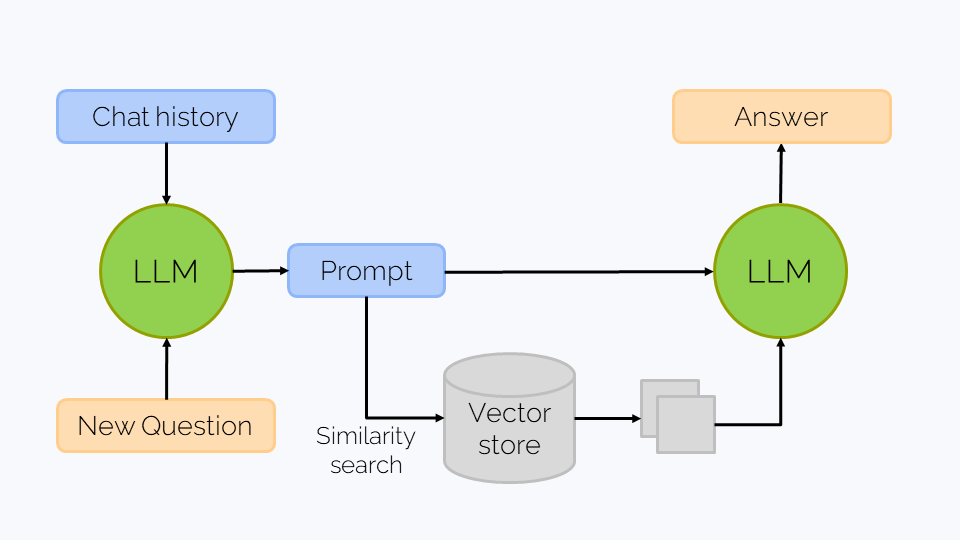

In [ ]:
from IPython.display import Image
Image("/content/langchain_vectorstore.png", width=600)

One of the goals of this week is to create your own RAG-based app. **RAG** (**R**etrieval **A**ugmented **G**eneration) is a concept of supporting a generative model with some kind of a retrieval tool which allows to get more faithful results and less hallucinations. This is crucial when we need to supply our users with facts, for example, if we're creating a navigation tool for a company's internal wiki.

Actually, we already touched upon RAG when we used DuckDuckGo. This time we'll retrieve data from a specific type of database - **vector store**.

The idea behind vector storages is to represent data items as **embeddings** (real vectors). When we receive a search query, we also somehow make it into an embedding and look for its nearest neighbors in the vector space which can be done rather quickly if somewhat approximately. If your embedding model produces vectors with strong semantic information embedded into it, you can have very high quality retrieval.

Vector storages emerged long before transformers, but, but because transformer models offer exceptional text understanding capabilities, using them to construct embeddings for vector storage systems is very popular. A typical AI-powered vector database query tool works like that:

- An LLM reformulates user's prompt into a vector store query;
- An embedding model is used to map the query into the database vector space;
- Vector store returns several items whose embeddings are nearest neighbors of the query's embedding;
- An LLM is used to process search results into a nice human readable output.

In this practice session you'll getting acquainted with vector databases, and in the homework you'll assemble all the pipline using LangChain.


There are quite a few vector stores available. We will employ the system called [Faiss](https://github.com/facebookresearch/faiss). It is a state-of-the-art library made by Meta for creating vector databases, which is used by a lot of production solutions.

We will use an IELTS essay dataset as a source of long texts, we want to search through.

Please make sure to put your credentials in an appropriate location following the instruction here https://github.com/Kaggle/kaggle-api#api-credentials

In [34]:
!pip install kaggle faiss-cpu tiktoken

In [41]:
!export KAGGLE_CONFIG_DIR="/Users/es/.kaggle/" && kaggle datasets download mazlumi/ielts-writing-scored-essays-dataset

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
ielts-writing-scored-essays-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [42]:
!unzip ielts-writing-scored-essays-dataset.zip

Archive:  ielts-writing-scored-essays-dataset.zip
  inflating: ielts_writing_dataset.csv  


Let's look at the data:

In [43]:
import pandas

/var/folders/5l/f_x4wc0n3nzgyf_7_znw3nbw0000gn/T/ipykernel_80223/902919682.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


In [44]:
pandas.options.display.max_colwidth = 100
reviews = pandas.read_csv("ielts_writing_dataset.csv")
reviews.head(2).dropna(axis=1)

,Task_Type,Question,Essay,Overall
0,1,The bar chart below describes some changes about the percentage of people were born in Australia...,"Between 1995 and 2010, a study was conducted representing the percentages of people born in Aust...",5.5
1,2,"Rich countries often give money to poorer countries, but it does not solve poverty. Therefore, d...","Poverty represents a worldwide crisis. It is the ugliest epidemic in a region, which could infec...",6.5


## Text splitters

The length of the documents that we could store in a vector storage is limited by the context length of your models. The texts we work with are often longer, so we need need **Text Splitters** to cut the texts into pieces.

First of all, let's check out how big our documents are:

In [45]:
# no truncation of text
pandas.options.display.max_colwidth = 100_000_000

In [46]:
import tiktoken
import re
enc = tiktoken.get_encoding("cl100k_base")

In [47]:
rows_as_single_string = reviews.apply(
    lambda row: (re.sub(' +', ' ', row.to_string().replace("\n", " "))),
    axis=1
)
max(map(lambda text: len(enc.encode(text)), rows_as_single_string))

772

Even though this is less then 4096 max ChatGPT tokens, models typically don't undrestand long texts well enough, so it's better to split this item.

Let's create a document list for our database

In [48]:
documents = rows_as_single_string.tolist()

Let's look at a simple splitter called `CharacterTextSplitter`. It splits text on `separator` then gathers chunks based on `chunk size` as measured by a `length_function`. `chunk_overlap` controlls how much of the previous chunk we want to include in the next one for continuity.

Let's see an example.

In [49]:
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator=" ",
    chunk_size=32,
    chunk_overlap=4,
    length_function=lambda text: len(enc.encode(text)),
)

In [50]:
from IPython.display import display

texts = text_splitter.create_documents(documents)
display(texts[0])
display(texts[1])
display(texts[2])

Created a chunk of size 108, which is longer than the specified 32


Document(page_content='Task_Type 1 Question The bar chart below describes some changes about the percentage of people')

Document(page_content='of people were born in Australia and who were born outside Australia living in urban,')

Document(page_content='in urban, rural and town between 1995 and 2010.Summarise the information by')

`RecursiveCharacterTextSplitter` is very similar to `CharacterTextSplitter`, except for the splitting and gathering logic. It inputs a list of `separators` (the default is ["\n\n", "\n", " ", ""]), which it then used in the same order as in the list. That means that first we split paragraphs, then if they are bigger than `chunk_size` we split on sentences, and so on. This helps the chunks to be a bit more cohesive.

In [51]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=32,
    chunk_overlap=4,
    length_function=lambda text: len(enc.encode(text)),
    add_start_index=True,
)

In [52]:
texts = text_splitter.create_documents(documents)
display(texts[0])
display(texts[1])
display(texts[2])

Document(page_content='Task_Type 1 Question The bar chart below describes some changes about the percentage of people were born in Australia and who were born outside Australia living in urban, rural', metadata={'start_index': 0})

Document(page_content='in urban, rural and town between 1995 and 2010.Summarise the information by selecting and reporting the main features and make comparisons where relevant.', metadata={'start_index': 161})

Document(page_content='comparisons where relevant. Essay Between 1995 and 2010, a study was conducted representing the percentages of people born in Australia, versus people born outside', metadata={'start_index': 288})

Probably the most reasonable way to split is not by characters but by tokens using the model's tokenizer. LangChain supports creating a text splitter directly from tiktoken.

In [53]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=32,
    chunk_overlap=4,
    add_start_index=True
)

In [54]:
texts = text_splitter.create_documents(documents)
display(texts[0])
display(texts[1])
display(texts[2])

Document(page_content='Task_Type 1 Question The bar chart below describes some changes about the percentage of people were born in Australia and who were born outside Australia living in urban, rural', metadata={'start_index': 0})

Document(page_content='in urban, rural and town between 1995 and 2010.Summarise the information by selecting and reporting the main features and make comparisons where relevant. Essay Between', metadata={'start_index': 161})

Document(page_content='Essay Between 1995 and 2010, a study was conducted representing the percentages of people born in Australia, versus people born outside Australia, living in urban, rural,', metadata={'start_index': 316})

## Vector database creation

Let's create a database of segments of IELTS essays and examinator comments.

In [55]:
from langchain.docstore.document import Document
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import FAISS

# Load the document, split it into chunks, embed each chunk and load it into the vector store.
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=256,
    chunk_overlap=16,
    add_start_index=True
)
splitted_documents = text_splitter.create_documents(documents)
db = FAISS.from_documents(splitted_documents, OpenAIEmbeddings())

/Users/es/Desktop/ml-playground/generative-ai/practices-and-hws/venv/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.embeddings.openai.OpenAIEmbeddings` was deprecated in langchain-community 0.1.0 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


Now we can perform similarity search using our embeddings

In [56]:
query = "An awesome essay about bar charts"
docs = db.similarity_search(query)
docs[0].page_content

"Task_Type 1 Question The bar charts below shows the number of visits to a community website in the first and second year of use.Summarize the information by selecting and reporting the main features and mae comparisons with relevant. Essay The bar chart illustrates the quantity of visits by the thousands paid to a community website within the first two years of use.\\nOverall, there is a greater upward trend from the second year of use compared to the first year of use. In addition to that, in both years the website undergoes a drastic fluctuation in numbers. It can be observed that initially in the month of September, number of visits in the first year of use are lower than second year of use, but numbers of the former subsequently surpasses the latter in the final month of August.\\nIn regards to the first year of use, quantity of visits increases from about 2000 visits in September to 10000 visits within 2 months and remains constant for another month. Following that, numbers plumm

In [57]:
query = "A poorly written essay"
docs = db.similarity_search(query)
docs[0].page_content

'but you must offer more arguments regarding why you agree or disagree. There are many spelling, punctuation and article errors. The essay is easy to follow but has the appearance of the writer running short of time. Task_Response NaN Coherence_Cohesion NaN Lexical_Resource NaN Range_Accuracy NaN Overall 5.0'

This week we've learned:
- How to use LangChain library.
- How to add plugins to an help an LLM excel in more complex tasks.
- How to interact with a database with an LLM.
- How to create a vector database and how to interact with it.


In this week's homework you'll:
- Learn how to make ChatGPT nail high-school tests.
- Create a more robust vector database.
- Make your own ChatGPT plugin.